# Import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## read the dataset

In [329]:
data = pd.read_csv('E:\\python for data science\\data analysis projects\\New folder\\sea_levels_Predict2025.csv')

In [330]:
data.head(10)
# GMSL is a global mean sea level

,Time,GMSL,GMSL Uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
5,1880-06-15,-159.6,24.2
6,1880-07-15,-159.6,24.2
7,1880-08-15,-161.8,24.2
8,1880-09-15,-158.9,24.2
9,1880-10-15,-150.3,24.2


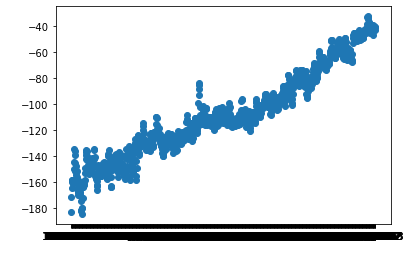

In [5]:
plt.scatter(x = data['Time'], y = data['GMSL'])
plt.xlabel('Time',color = 'white')
plt.ylabel('GMSL',color = 'white')
plt.show()

# data preprocessing

In [331]:
data.isnull()

,Time,GMSL,GMSL Uncertainty
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [332]:
import datetime

In [333]:
 data['Time'].describe()

count           1000
unique          1000
top       1881-06-15
freq               1
Name: Time, dtype: object

In [334]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              1000 non-null   object 
 1   GMSL              1000 non-null   float64
 2   GMSL Uncertainty  1000 non-null   float64
dtypes: float64(2), object(1)
memory usage: 23.6+ KB
None


In [63]:
#data1 = pd.to_datetime(datanew,errors = 'coerce', format = '%m/%d/%Y')
#data2 = pd.to_datetime(data['Time'][241:],errors = 'coerce', format = '%Y-%m-%d')
dates = data['Time'].apply(lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))

In [66]:
data['Dates'] = dates

In [83]:
data.tail()
#df = data.drop('New Times', axis = 1, inplace = True)
df = data.drop('Time', axis = 1, inplace = True)

In [335]:
data.head()

,Time,GMSL,GMSL Uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2


In [340]:
data['Time'] = pd.to_datetime(data['Time'])

In [341]:
#df['Year'] = df['Purchase Date'].dt.year
data['Year'] = data['Time'].dt.year

In [342]:
print(data['Time'].tail())

995   1962-12-15
996   1963-01-15
997   1963-02-15
998   1963-03-15
999   1963-04-15
Name: Time, dtype: datetime64[ns]


In [343]:
data.head()


,Time,GMSL,GMSL Uncertainty,Year
0,1880-01-15,-183.0,24.2,1880
1,1880-02-15,-171.1,24.2,1880
2,1880-03-15,-164.3,24.2,1880
3,1880-04-15,-158.2,24.2,1880
4,1880-05-15,-158.7,24.2,1880


In [344]:
#data_df['conv_date'] = data_df.date.apply(lambda x: x.toordinal())
data['Test'] = data.Time.apply(lambda x: x.toordinal())

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1000 non-null   datetime64[ns]
 1   GMSL              1000 non-null   float64       
 2   GMSL Uncertainty  1000 non-null   float64       
 3   Year              1000 non-null   int64         
 4   Test              1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 39.2 KB


In [348]:
data.head()


,Time,GMSL,GMSL Uncertainty,Year,Test
0,1880-01-15,-183.0,24.2,1880,686305
1,1880-02-15,-171.1,24.2,1880,686336
2,1880-03-15,-164.3,24.2,1880,686365
3,1880-04-15,-158.2,24.2,1880,686396
4,1880-05-15,-158.7,24.2,1880,686426


In [104]:
df = data.drop(['Dates', 'Time','Year'],axis = 1)

In [349]:
data

,Time,GMSL,GMSL Uncertainty,Year,Test
0,1880-01-15,-183.0,24.2,1880,686305
1,1880-02-15,-171.1,24.2,1880,686336
2,1880-03-15,-164.3,24.2,1880,686365
3,1880-04-15,-158.2,24.2,1880,686396
4,1880-05-15,-158.7,24.2,1880,686426
...,...,...,...,...,...
995,1962-12-15,-41.7,6.7,1962,716589
996,1963-01-15,-40.5,6.6,1963,716620
997,1963-02-15,-40.7,6.6,1963,716651
998,1963-03-15,-40.8,6.6,1963,716679


In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1000 non-null   datetime64[ns]
 1   GMSL              1000 non-null   float64       
 2   GMSL Uncertainty  1000 non-null   float64       
 3   Year              1000 non-null   int64         
 4   Test              1000 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 39.2 KB


In [233]:
year_2000 = ['1/15/2000', '2/15/2000', '3/15/2000',
             '4/15/2000' , '5/15/2000' , '6/15/2000' , 
             '7/15/2000' , '8/15/2000', ' 9/15/2000' ,
             '10/15/2000' , '11/15/2000' , '12/15/2000']

In [250]:
test = pd.to_datetime(year_2000)

In [253]:
test = pd.DataFrame(year_2000)

In [254]:
test['time'] = test[0]

In [263]:
test = test.drop(0, axis = 1)

In [271]:
year_2000 = [[730134,730165,730194,730225,730255,730286,730316,730347,730378,730408,730439,730469]]

# use linear regression algo

In [89]:
from sklearn import linear_model

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x = df['Test']
y = df['GMSL']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)          
#(X,y,train_size=.7,random_state=42)

In [137]:
y_train = y_train.values.reshape(1, -1)
y_test = y_test.values.reshape(1, -1)


In [140]:
classifier = linear_model.LinearRegression()

In [143]:
classifier.fit(df[['Test']], df[['GMSL']])

LinearRegression()

# calculate the slope and y intercept

In [151]:
# slope
classifier.coef_

array([[0.00365254]])

In [320]:
# intercept
classifier.intercept_

array([-2669.82029976])

In [324]:
#we firstly converted year 2000 to int64
year_2000 = {'Year 2000':[730134,730165,730194,730225,730255,730286,730316,730347,730378,730408,730439,730469]}

In [325]:
x_test = pd.DataFrame(year_2000)
x_test

,Year 2000
0,730134
1,730165
2,730194
3,730225
4,730255
5,730286
6,730316
7,730347
8,730378
9,730408


In [327]:
y_predict = classifier.predict(x_test)
y_predict

array([[-2.97492778],
       [-2.86169897],
       [-2.75577524],
       [-2.64254643],
       [-2.53297015],
       [-2.41974134],
       [-2.31016507],
       [-2.19693626],
       [-2.08370744],
       [-1.97413117],
       [-1.86090236],
       [-1.75132609]])

# calculate the slope and y intercept

In [ ]:
y = a*x + b

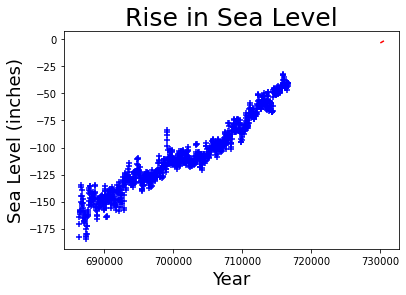

In [363]:
%matplotlib inline
plt.title('Rise in Sea Level', fontsize = 25)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Sea Level (inches)', fontsize = 18)
plt.scatter(data['Test'],data['GMSL'], color = 'blue',marker = '+')
plt.plot(x_test,y_predict, color = 'red')
plt.plot(x_test, a*x+b)   
plt.show()